/tmp/ipykernel_69202/3667615748.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_results = all_results.append(results, ignore_index=True)
/tmp/ipykernel_69202/3667615748.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_results = all_results.append(results, ignore_index=True)
/tmp/ipykernel_69202/3667615748.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_results = all_results.append(results, ignore_index=True)


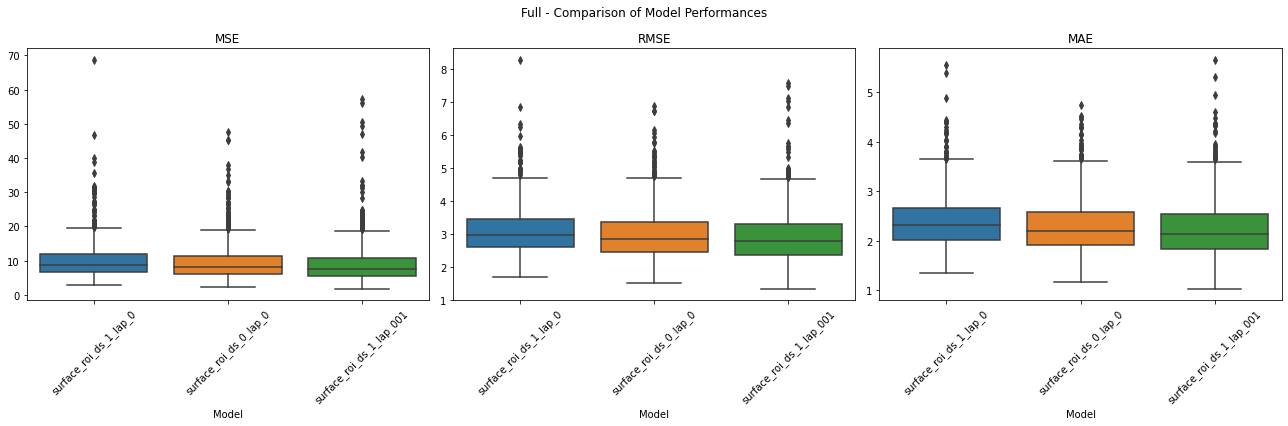

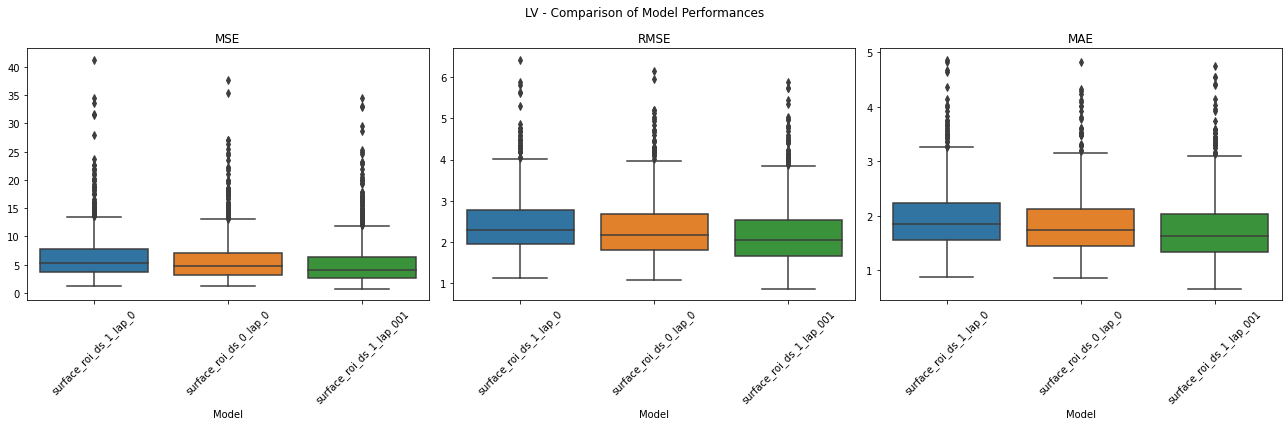

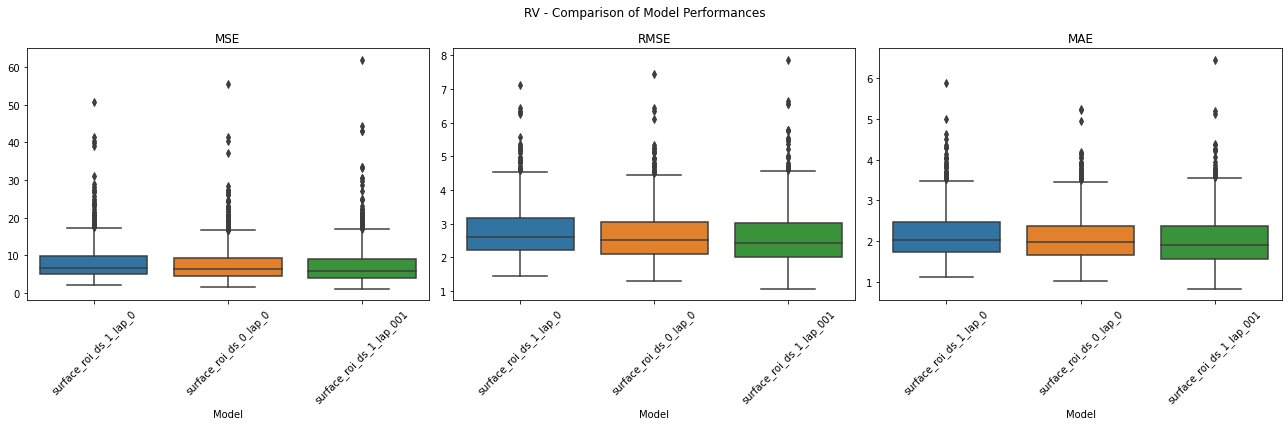

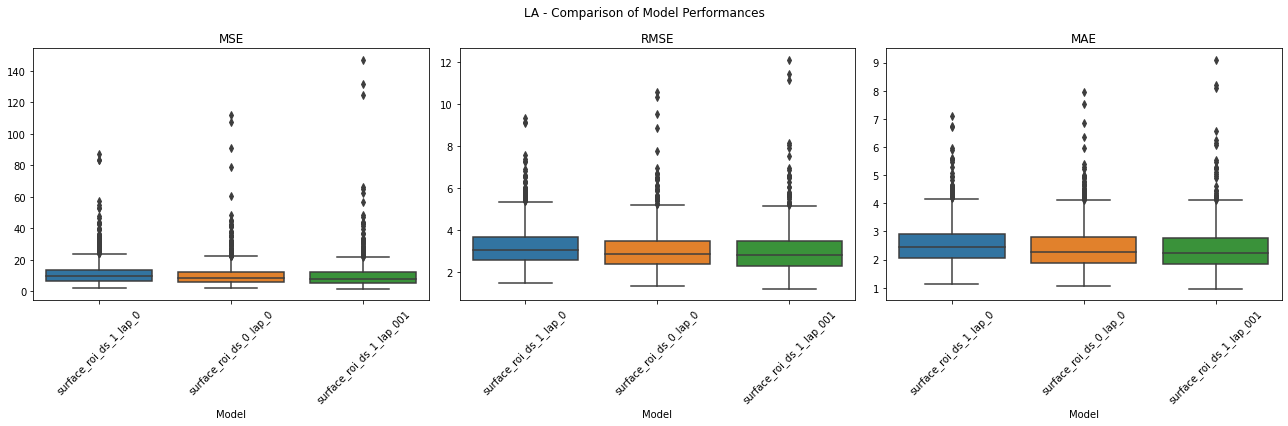

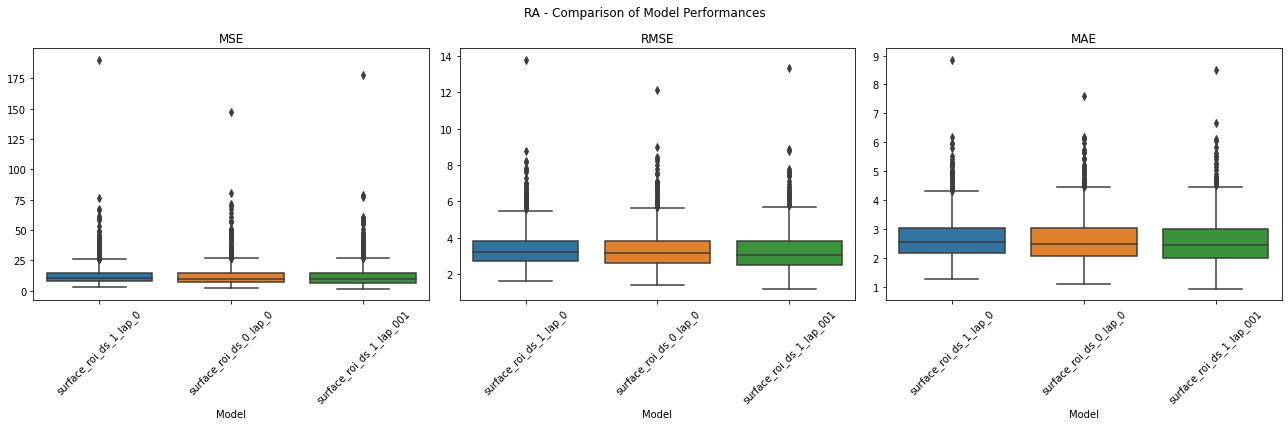

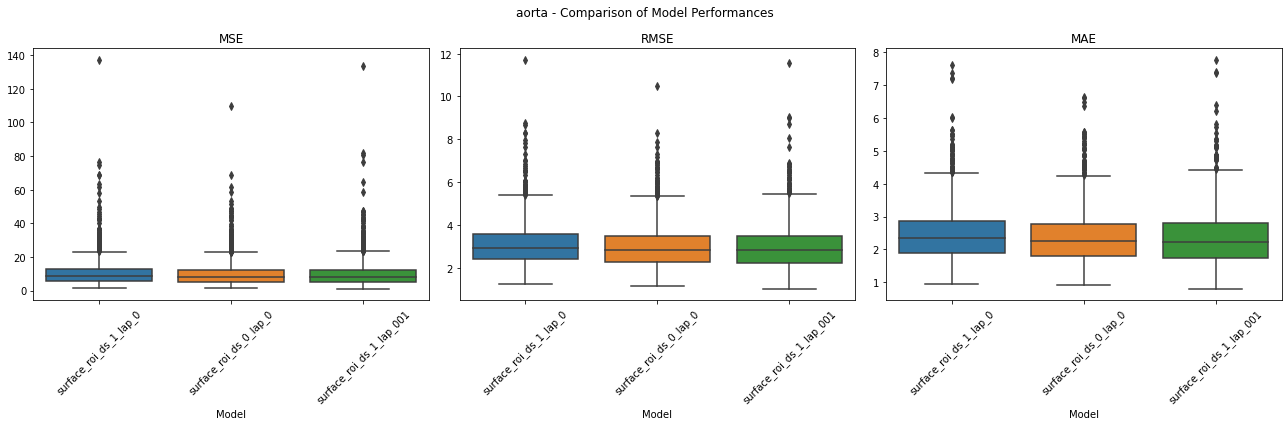

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to read and process the evaluation results from a CSV file
def process_results(csv_file, model_name):
    df = pd.read_csv(csv_file)
    df['Model'] = model_name
    return df[['Model', 'Subpart', 'MSE', 'RMSE', 'MAE']]

# Directory containing the evaluation results
results_dir = "../Predictions/Surface/"

# DataFrame to store the evaluation results for each subpart
all_results = pd.DataFrame()

# Iterate over the models in the directory
for model_name in os.listdir(results_dir):
    model_path = os.path.join(results_dir, model_name)
    eval_file = os.path.join(model_path, "eval.csv")

    # Process the evaluation results for the current model
    results = process_results(eval_file, model_name)
    all_results = all_results.append(results, ignore_index=True)

# Create boxplots for MSE, RMSE, and MAE for each subpart
subparts = ['Full', 'LV', 'RV', 'LA', 'RA', 'aorta']
metrics = ['MSE', 'RMSE', 'MAE']

for subpart in subparts:
    fig, axes = plt.subplots(1, len(metrics), figsize=(18, 6))

    for i, metric in enumerate(metrics):
        subset = all_results[all_results['Subpart'] == subpart]
        sns.boxplot(x="Model", y=metric, data=subset, ax=axes[i])
        axes[i].set_title(metric)
        axes[i].set_ylabel('')
        axes[i].tick_params(axis='x', rotation=45)

    plt.suptitle(f"{subpart} - Comparison of Model Performances")
    plt.tight_layout()
    plt.show()


In [2]:
def get_nice_dataframe_sub(df, metrics, subpart = "Full", vertical = False):
    models = df["Model"].unique()
    df = df.copy()
    df = df[df["Subpart"] == subpart]

    # creates a dataframe where each metric has a column for its mean and std.
    # the mean and std. are computed for each model
    # the dataframe is then saved as a csv file
    df_std = pd.DataFrame(columns=metrics)
    for metric in metrics:
        df_std[metric] = df.groupby(["Model"])[metric].std()

    df_mean = pd.DataFrame(columns=metrics)
    for metric in metrics:
        df_mean[metric] = df.groupby(["Model"])[metric].mean()

    df_mean = df_mean.round(2)
    df_std = df_std.round(2)

    #combine both dataframes, intercalating columns

    empty_df = pd.DataFrame(columns = metrics)
    for metric in metrics:
        i = 0
        for model in models:
            mean_str = str(df_mean.loc[model, metric]) 
            std_str = str(df_std.loc[model, metric]) 
            if len(mean_str) == 3 or (mean_str[2] == '.' and len(mean_str) == 4):
                mean_str += '0'
            if len(std_str) == 3 or (std_str[2] == '.' and len(std_str) == 4):
                std_str += '0'
              
            empty_df.loc[model, metric] = mean_str + " (" + std_str + ")"
            i+=1

    # transposes the dataframe
    if vertical:
        empty_df = empty_df.T
    
    return empty_df

metrics = ['MAE', 'MSE', 'RMSE']
subparts = ['Full', 'LV', 'RV', 'LA', 'RA', 'aorta']

for subpart in subparts:
    print(subpart)
    nice = get_nice_dataframe_sub(all_results, metrics, subpart, vertical=1)
    display(nice)


Full


,surface_roi_ds_1_lap_0,surface_roi_ds_0_lap_0,surface_roi_ds_1_lap_001
MAE,2.39 (0.54),2.29 (0.55),2.22 (0.58)
MSE,10.05 (5.28),9.39 (5.26),9.04 (5.58)
RMSE,3.09 (0.73),2.97 (0.75),2.90 (0.79)


LV


,surface_roi_ds_1_lap_0,surface_roi_ds_0_lap_0,surface_roi_ds_1_lap_001
MAE,1.95 (0.55),1.84 (0.56),1.75 (0.60)
MSE,6.37 (4.00),5.78 (3.89),5.31 (4.08)
RMSE,2.43 (0.68),2.30 (0.69),2.18 (0.75)


RV


,surface_roi_ds_1_lap_0,surface_roi_ds_0_lap_0,surface_roi_ds_1_lap_001
MAE,2.15 (0.57),2.08 (0.58),2.03 (0.62)
MSE,8.08 (4.83),7.60 (4.83),7.39 (5.20)
RMSE,2.75 (0.74),2.65 (0.76),2.60 (0.81)


LA


,surface_roi_ds_1_lap_0,surface_roi_ds_0_lap_0,surface_roi_ds_1_lap_001
MAE,2.55 (0.76),2.42 (0.77),2.36 (0.80)
MSE,11.26 (8.04),10.30 (8.51),9.93 (9.37)
RMSE,3.21 (0.98),3.05 (1.01),2.97 (1.04)


RA


,surface_roi_ds_1_lap_0,surface_roi_ds_0_lap_0,surface_roi_ds_1_lap_001
MAE,2.68 (0.78),2.62 (0.79),2.55 (0.80)
MSE,12.88 (10.00),12.36 (9.62),11.78 (9.71)
RMSE,3.43 (1.06),3.35 (1.08),3.25 (1.09)


aorta


,surface_roi_ds_1_lap_0,surface_roi_ds_0_lap_0,surface_roi_ds_1_lap_001
MAE,2.48 (0.85),2.40 (0.85),2.36 (0.87)
MSE,10.90 (9.22),10.31 (8.47),10.05 (9.06)
RMSE,3.12 (1.09),3.03 (1.07),2.97 (1.11)


/tmp/ipykernel_69202/3849485326.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_results = all_results.append(results, ignore_index=True)
/tmp/ipykernel_69202/3849485326.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_results = all_results.append(results, ignore_index=True)
/tmp/ipykernel_69202/3849485326.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_results = all_results.append(results, ignore_index=True)


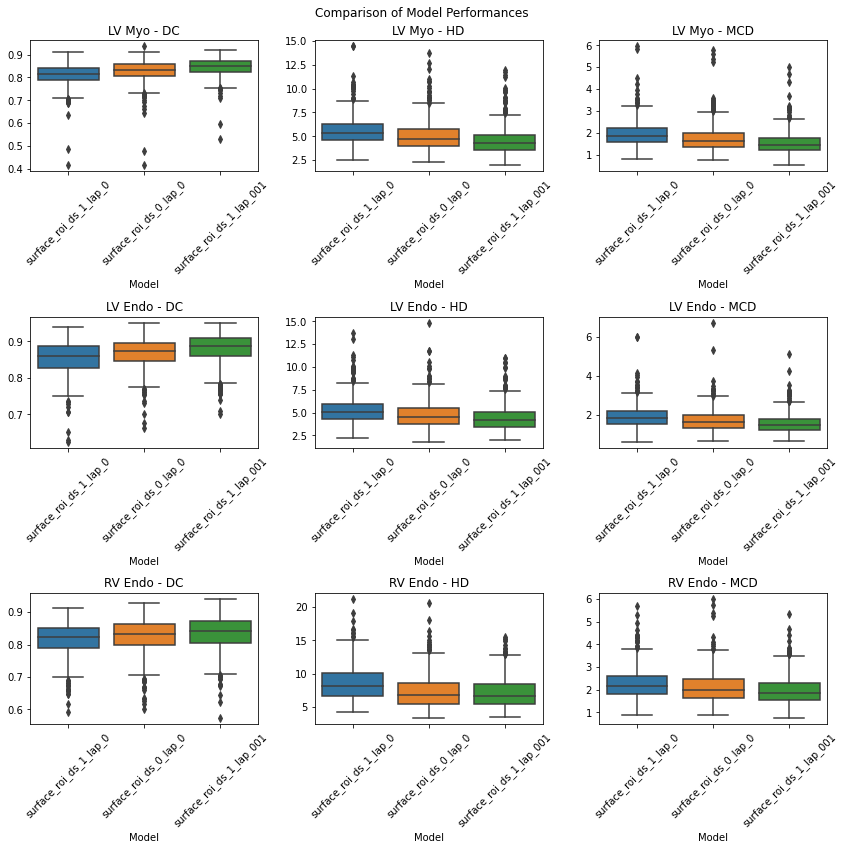

In [3]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to read and process the evaluation results from a CSV file
def process_results(csv_file, model_name):
    df = pd.read_csv(csv_file)
    df['Model'] = model_name
    return df

# Directory containing the evaluation results
results_dir = "../Predictions/Surface/"

# DataFrame to store the evaluation results for each subpart
all_results = pd.DataFrame()

# Iterate over the models in the directory
for model_name in os.listdir(results_dir):
    model_path = os.path.join(results_dir, model_name)
    eval_file = os.path.join(model_path, "metrics.csv")

    if not os.path.exists(eval_file):
        continue
    
    # Process the evaluation results for the current model
    results = process_results(eval_file, model_name)
    all_results = all_results.append(results, ignore_index=True)

metrics = ['LV Myo - DC', 'LV Myo - HD', 'LV Myo - MCD', 
           'LV Endo - DC', 'LV Endo - HD', 'LV Endo - MCD', 
           'RV Endo - DC', 'RV Endo - HD', 'RV Endo - MCD']

fig, axes = plt.subplots(3, 3, figsize=(12, 12))

for i, metric in enumerate(metrics):
    sns.boxplot(x="Model", y=metric, data=all_results, ax=axes[i // 3, i%3])
    axes[i // 3, i%3].set_title(metric)
    axes[i // 3, i%3].set_ylabel('')
    axes[i // 3, i%3].tick_params(axis='x', rotation=45)

plt.suptitle("Comparison of Model Performances")
plt.tight_layout()
plt.show()


In [4]:
def get_nice_dataframe(df, metrics, vertical = False):
    models = df["Model"].unique()

    # creates a dataframe where each metric has a column for its mean and std.
    # the mean and std. are computed for each model
    # the dataframe is then saved as a csv file
    df_std = pd.DataFrame(columns=metrics)
    for metric in metrics:
        df_std[metric] = df.groupby(["Model"])[metric].std()

    df_mean = pd.DataFrame(columns=metrics)
    for metric in metrics:
        df_mean[metric] = df.groupby(["Model"])[metric].mean()

    df_mean = df_mean.round(2)
    df_std = df_std.round(2)

    #combine both dataframes, intercalating columns

    empty_df = pd.DataFrame(columns = metrics)
    for metric in metrics:
        i = 0
        for model in models:
            mean_str = str(df_mean.loc[model, metric]) 
            std_str = str(df_std.loc[model, metric]) 
            if len(mean_str) == 3 or (mean_str[2] == '.' and len(mean_str) == 4):
                mean_str += '0'
            if len(std_str) == 3 or (std_str[2] == '.' and len(std_str) == 4):
                std_str += '0'
              
            empty_df.loc[model, metric] = mean_str + " (" + std_str + ")"
            i+=1

    # transposes the dataframe
    if vertical:
        empty_df = empty_df.T
    
    return empty_df


metrics = ['LV Endo - DC', 'LV Endo - HD', 'LV Endo - MCD', 
           'LV Myo - DC', 'LV Myo - HD', 'LV Myo - MCD', 
           'RV Endo - DC', 'RV Endo - HD', 'RV Endo - MCD']


#metrics = ["LA 2CH - DC", "LA 2CH - HD", "LA 2CH - MCD",
#            "LA 4CH - DC", "LA 4CH - HD", "LA 4CH - MCD",
#            "RA 4CH - DC", "RA 4CH - HD", "RA 4CH - MCD"]

nice = get_nice_dataframe(all_results, metrics, vertical=1)

nice["MCSI-Net-Paper"] = ["0.88 (0.05)", "7.06 (2.64)", "1.86 (0.79)",
                    "0.78 (0.08)", "4.75 (1.76)", "1.86 (0.82)", 
                    "0.85 (0.06)", "7.06 (2.64)", "2.27 (0.95)"]

display(nice)

,surface_roi_ds_1_lap_0,surface_roi_ds_0_lap_0,surface_roi_ds_1_lap_001,MCSI-Net-Paper
LV Endo - DC,0.86 (0.04),0.87 (0.04),0.88 (0.04),0.88 (0.05)
LV Endo - HD,5.29 (1.46),4.76 (1.45),4.40 (1.41),7.06 (2.64)
LV Endo - MCD,1.91 (0.58),1.73 (0.57),1.57 (0.51),1.86 (0.79)
LV Myo - DC,0.81 (0.05),0.83 (0.05),0.84 (0.04),0.78 (0.08)
LV Myo - HD,5.52 (1.45),5.03 (1.52),4.54 (1.39),4.75 (1.76)
LV Myo - MCD,1.94 (0.57),1.75 (0.61),1.54 (0.51),1.86 (0.82)
RV Endo - DC,0.82 (0.05),0.83 (0.05),0.84 (0.05),0.85 (0.06)
RV Endo - HD,8.54 (2.57),7.27 (2.48),7.16 (2.42),7.06 (2.64)
RV Endo - MCD,2.25 (0.66),2.12 (0.69),1.98 (0.63),2.27 (0.95)
